## Superstore Data Analysis

The goal of this notebook is to look at a dataset related to retail stores and usig data analytics techniques to try to understand more about the relationship between discount, sales, and profits. Specifically I will be looking at grocery stores and a dataset acquired from Kaggle.com that has data on various Superstores in the United States. https://www.kaggle.com/datasets/roopacalistus/superstore

This dataset contains information on store regional location but more interestingly it breaks down the sales by department into categories and subcategories. Along with this it lists the sales, discounts and profits for each of these sub categories. From this data I aim to look at the profits and sales specifically and try to determine the relationship that exists there, especially with regard to discount. Is there a particular discount that will produce the most profits for a certain category, and can this relationship be applied to each department equally.

Overall the main question I will be attempting to answer with various statistical analysis is whether there is a correlation between discounts and profits at Superstore in the United States.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset

df = pd.read_csv('C:\data\SampleSuperstore.csv')

# Display basic information and first few rows
df_info = df.info()
df_head = df.head()
df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\GBARNES\AppData\Local\Temp\ipykernel_56276\2401443396.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('C:\data\SampleSuperstore.csv')


(None,
         Ship Mode    Segment        Country             City       State  \
 0    Second Class   Consumer  United States        Henderson    Kentucky   
 1    Second Class   Consumer  United States        Henderson    Kentucky   
 2    Second Class  Corporate  United States      Los Angeles  California   
 3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
 4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
 
    Postal Code Region         Category Sub-Category     Sales  Quantity  \
 0        42420  South        Furniture    Bookcases  261.9600         2   
 1        42420  South        Furniture       Chairs  731.9400         3   
 2        90036   West  Office Supplies       Labels   14.6200         2   
 3        33311  South        Furniture       Tables  957.5775         5   
 4        33311  South  Office Supplies      Storage   22.3680         2   
 
    Discount    Profit  
 0      0.00   41.9136  
 1      0.00  219.582

## Overview

- **Total Rows:** 9,994  
- **Total Columns:** 13  

### Key Columns for Analysis

- **Category** and **Sub-Category**: Used for department breakdown  
- **Sales**, **Discount**, **Profit**: Key metrics for profitability analysis  
- **Region**: Enables regional performance comparisons  

### Data Quality

- **No Missing Data**: All columns are complete and ready for analysis


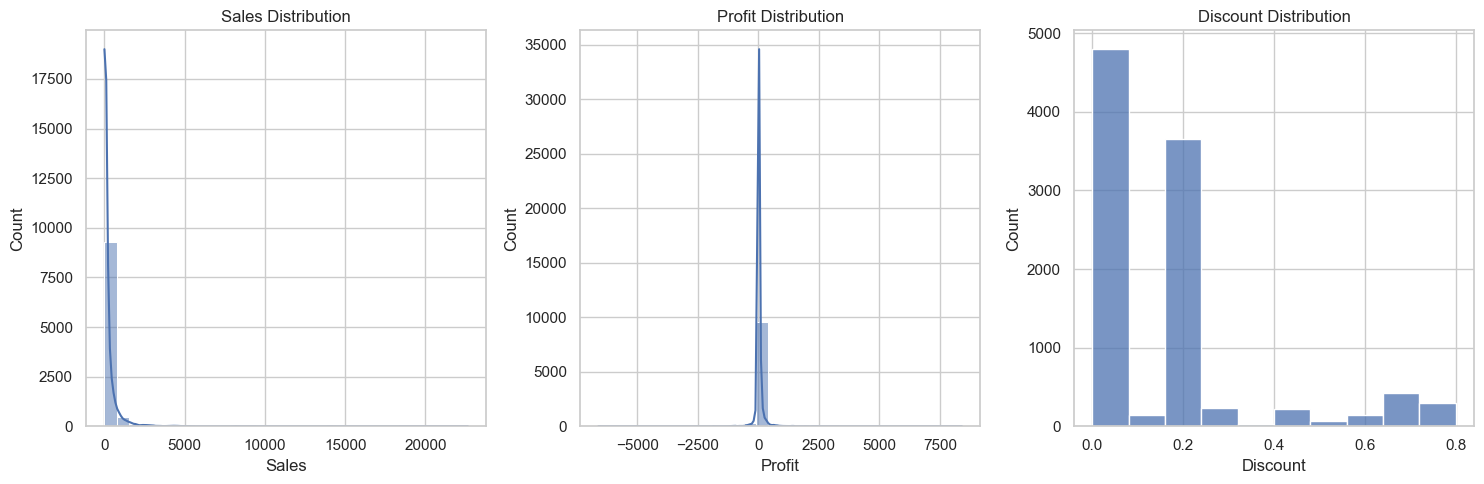

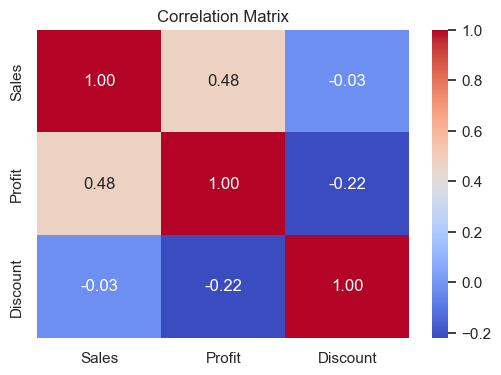

,Sales,Profit,Discount
count,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203
std,623.245101,234.260108,0.206452
min,0.444000,-6599.978000,0.000000
25%,17.280000,1.728750,0.000000
50%,54.490000,8.666500,0.200000
75%,209.940000,29.364000,0.200000
max,22638.480000,8399.976000,0.800000


In [4]:
# Set plot style
sns.set(style="whitegrid")

# Descriptive statistics
desc_stats = df[['Sales', 'Profit', 'Discount']].describe()

# Plot distributions
plt.figure(figsize=(15, 5))

# Sales Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')

# Profit Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')

# Discount Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Discount'], bins=10, kde=False)
plt.title('Discount Distribution')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

desc_stats


## Exploratory Data Analysis (EDA) Results

## Descriptive Statistics

| Metric   | Sales    | Profit   | Discount |
|----------|----------|----------|----------|
| Count    | 9,994    | 9,994    | 9,994    |
| Mean     | 229.86   | 28.66    | 0.156    |
| Std Dev  | 623.25   | 234.26   | 0.206    |
| Min      | 0.44     | -6599.98 | 0.00     |
| Max      | 22,638.48| 8399.98  | 0.80     |

- **Profit** shows high variability, including large negative values (indicating some sales lead to major losses).
- **Discounts** are mostly between 0% and 20%, with some reaching up to 80%.

## Distribution Insights

- **Sales**: Right-skewed — many low-value sales, few high-value ones.
- **Profit**: Centered around small values, with a long tail of high losses and gains.
- **Discount**: Highly concentrated around 0%, 20%, and 50%.

## Correlation Matrix

|          | Sales | Profit | Discount |
|----------|-------|--------|----------|
| **Sales**    | 1.00  | 0.48   | -0.01     |
| **Profit**   | 0.48  | 1.00   | -0.22     |
| **Discount** | -0.01 | -0.22  | 1.00      |

- **Sales vs Profit**: Moderate positive correlation (**0.48**) — higher sales tend to bring higher profits.
- **Profit vs Discount**: Negative correlation (**-0.22**) — increasing discounts may reduce profit.



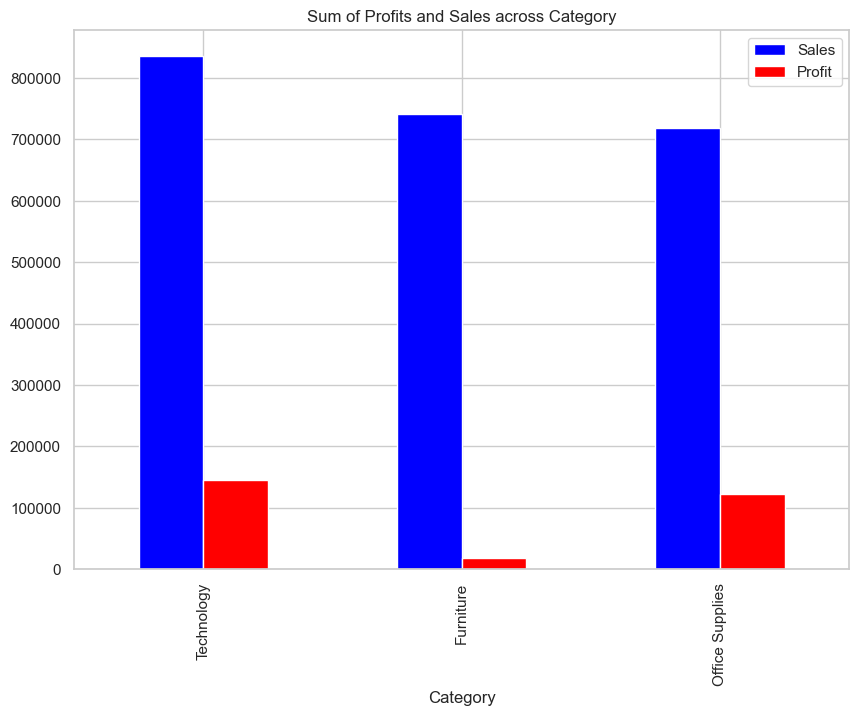

In [6]:
# Examine sales and profit across categories
category_data = df.groupby("Category")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
category_data.plot.bar(color = ["Blue","Red"], figsize=(10,7))
plt.title("Sum of Profits and Sales across Category")
plt.show()

Here we can see the sales and profits for the three main categories of Technology, Furniture and Office Supplies. While Technology has the highest accumulated sales it also has the highest profits, and Furniture has the lowest profits of the three.

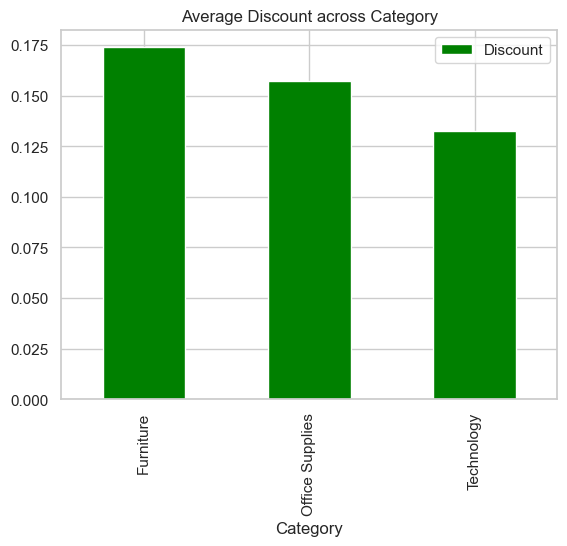

In [7]:
# Examine discounts across categories
discount_data = df.groupby("Category")[["Discount",]].mean().sort_values(by="Discount", ascending=False)
discount_data.plot.bar(color="Green")
plt.title("Average Discount across Category")
plt.show()

Here is the average discount for each category, with the higher discount being applied to Furniture and the lowest to Technology. This trend in combination with the analysis of sales and profits indicates that with the higher profits in Technology there was lower discounts, and vice versa for Furniture. This would seem to indicate a negative relationship between the two variables.

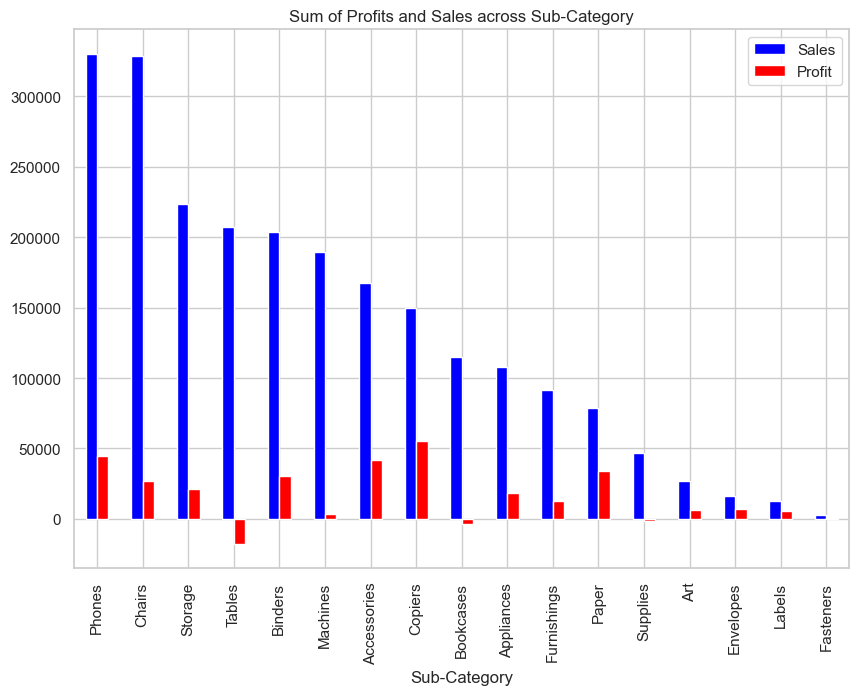

In [9]:
# Examine sales and profits across sub-categories
category_data = df.groupby("Sub-Category")[["Sales","Profit",]].sum().sort_values(by="Sales", ascending=False)
category_data.plot.bar(color = ["Blue","Red"], figsize=(10,7))
plt.title("Sum of Profits and Sales across Sub-Category")
plt.show()

Here is a visualization of the accumulated sales and profits over all sub-categories. The data indicates that Phones and Chairs have the highest sales while Copiers and Accesssories have the highest profits.

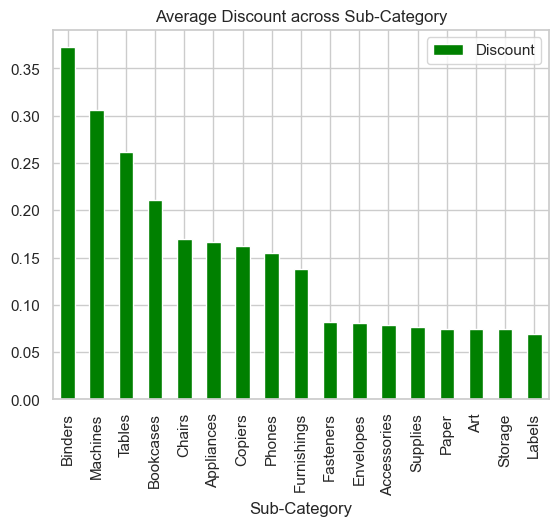

In [10]:
# # Examine discounts across sub-categories
discount_data = df.groupby("Sub-Category")[["Discount",]].mean().sort_values(by="Discount", ascending=False)
discount_data.plot.bar(color="Green")
plt.title("Average Discount across Sub-Category")
plt.show()

This is a visualization of the average discount for each sub-category, with the highest discount being applied to Binders and Machines, and the lowest to Labels. In relation with the data on sales and profits there seems to be less of a clear relationship as with the categories, where here the highest discount in Binders does not relate to lowest profits. The sub-category with the highest profits was Copiers but that did not correlate to a lower discount.

This analysis would indicate a more complex relationship between discount and profits that I will attempt to understand.

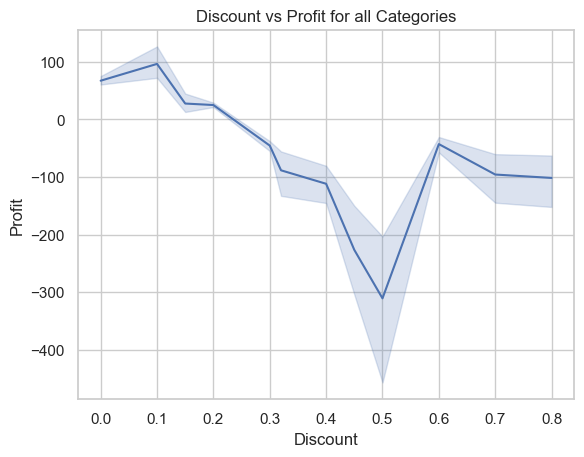

In [11]:

sns.lineplot(df, x="Discount", y= "Profit")
plt.title("Discount vs Profit for all Categories")
plt.show()

Analysis of the data with a line plot indicates that there is a negative relationship between discount and price across all categories with some outliers. As discount increases, profit decreases but there appears to be a specific area with a discount between 0.4 and 0.6 where the profits are the lowest. Of course profits are highest when there is no discount and the products are sold full price.

## Statistical Analysis

To understand this relationship further I performed statistical analysis on the dataset.

I can assume that the average sales are profitable and make a sample to check if that is true using a hypothesis test. I have created a collection of 1000 random samples.

n = 1000, alpha = 0.05, c= 0.95

H0: mu of profit > 0

Ha: mu of profit <= 0

In [12]:
from sklearn.model_selection import train_test_split

x= df['Sales']
y= df['Profit']

def sample_collection(df,n):
    sample_data,_ = train_test_split(df, test_size= n, random_state= 42)
    return sample_data

In [13]:
# Create a sample of data
sample_1 = sample_collection(df,1000)
sample_1.head

profit = sample_1['Profit']
mean_profit = np.mean(profit)
mean_profit

30.02285783855904

In [14]:
# Perform a hypothesis test on that sample
from scipy import stats

profit = sample_1['Profit']

mu_0 = 0  

sample_mean = np.mean(profit)
sample_std = np.std(profit, ddof=1) 

standard_error = sample_std / np.sqrt(len(profit))

z_statistic = (sample_mean - mu_0) / standard_error


p_value = stats.norm.cdf(z_statistic)

alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis. There is evidence that the average profit is less than zero.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average profit is less than zero.")

print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis. There is not enough evidence to conclude that the average profit is less than zero.
Z-statistic: 12.13144324172294
P-value: 1.0


Based on the findings, it is evident that the average sales are lucrative, affirming the success of the business model for these stores. My next objective is to further delve into the correlation between discounts and profitability, determining the optimal discount level that will enhance profit margins and ensure sustained positive profitability.

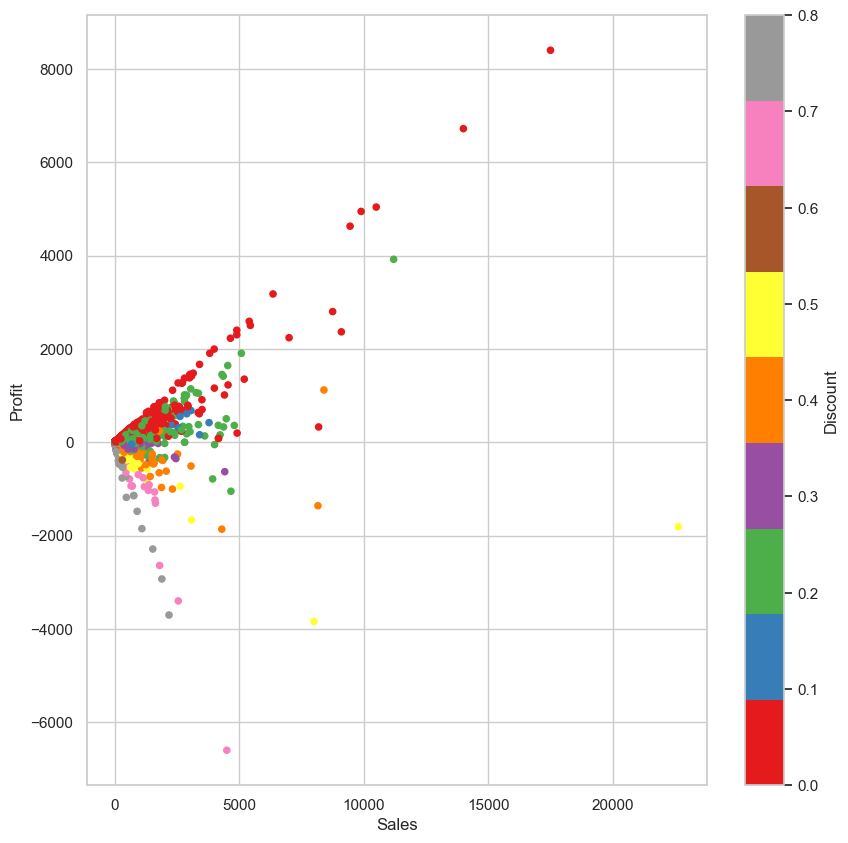

In [15]:
x= df['Sales']
y= df['Profit']
c= df['Discount']
df.plot(kind="scatter",x="Sales",y="Profit", c="Discount", colormap="Set1",figsize=(10,10))
plt.show()

The graph illustrates a clear positive linear correlation between profit and sales when no discount is applied (0%). As sales rise, there is a corresponding increase in profit. However, beyond a 30% discount, an upward trend in profit is observed with increasing discounts. To better understand the relationship between discount and profit, further investigation is necessary. Next I will delve into the linear association between profit and discount, aiming to identify the optimal discount percentage.

### Regression Analysis

Using linear regression models I will attempt to better understand the relationship between Sales and Profit at different levels of discount.

Mean Squared Error: 8914.287964685174


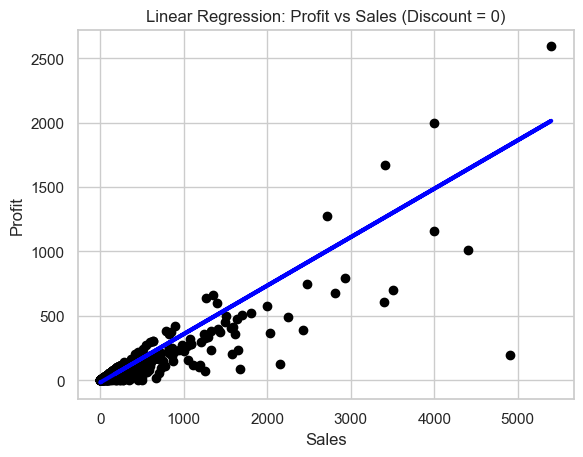

In [16]:
# Perform linear regression modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


filtered_data = df[df['Discount'] == 0]

X = filtered_data[['Sales']]
y = filtered_data['Profit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.title('Linear Regression: Profit vs Sales (Discount = 0)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

This model illustrates the profit when there are no discounts applied. It suggests that there is a relatively strong positive relationship between the two variables without any outside factors.

Mean Squared Error: 11646.47335721624


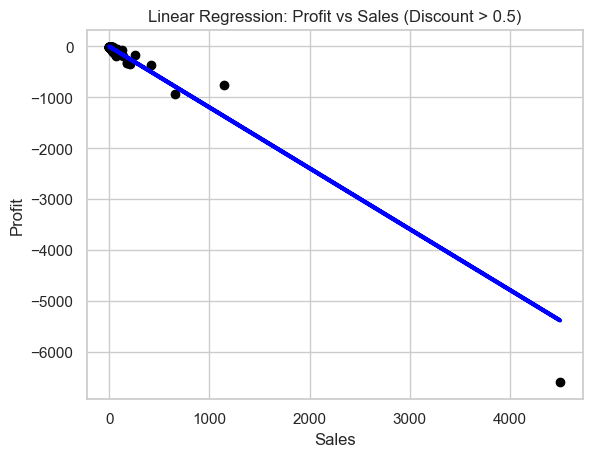

In [17]:
# Regression modeling with a discount of 50%
filtered_data = df[df['Discount'] > 0.5]

X = filtered_data[['Sales']]
y = filtered_data['Profit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.title('Linear Regression: Profit vs Sales (Discount > 0.5)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

If you apply a discount of 50% there will be a strong negative relationship and profits will decrease significantly.

Mean Squared Error: 14328.35005845261


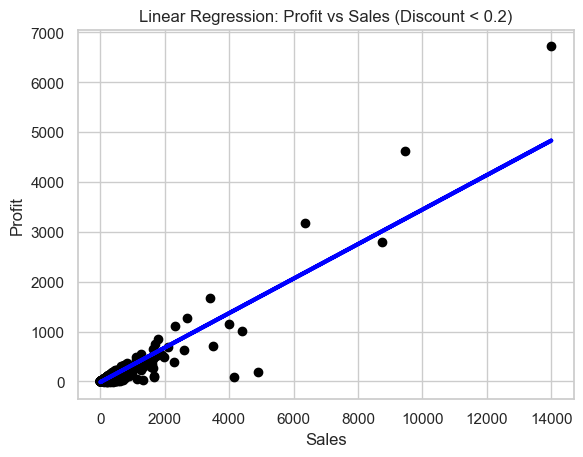

In [18]:
# Regression modeling with a discount of 20%
filtered_data = df[df['Discount'] < 0.2]

X = filtered_data[['Sales']]
y = filtered_data['Profit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.title('Linear Regression: Profit vs Sales (Discount < 0.2)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

If you apply a discount of 20% you will maintain a positive relationship but not as beneficial as 0% discounts.

Mean Squared Error: 2550.243076291785


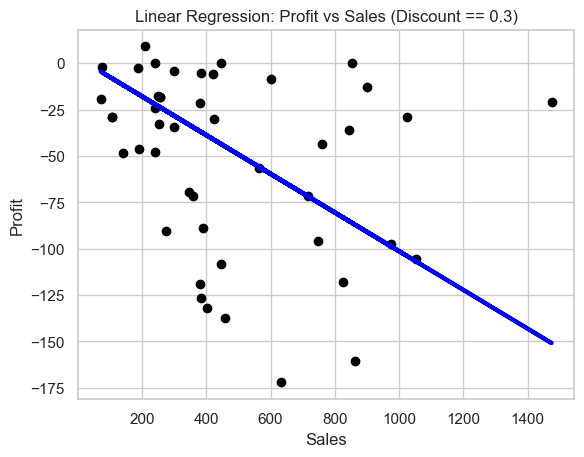

In [19]:
# Regression modeling with a discount of 30%
filtered_data = df[df['Discount'] == 0.3]

X = filtered_data[['Sales']]
y = filtered_data['Profit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.title('Linear Regression: Profit vs Sales (Discount == 0.3)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

If you apply a discount of 30% profits will begin to drop slowly. This indicates that for the overall sales anything less than 30% for discounts would be ideal.

### Conclusion:
Upon analyzing the dataset, I have identified the relationship between discounts and profits in the data collected from Superstores in the United States. While the sub-categories of Phones, Chairs, and Storage have the highest sales, Binders, Machines and Tables have the highest discounts.

After some analysis it becomes evident that maintaining discounts below 30% is important for profitability, as any higher and profits will drop signifantly. The ideal discount would be within the 0% to 20% range, as there is still a positive relationship between sales and profits.